# Panel of AI Minds
## Super Agentic Notebook

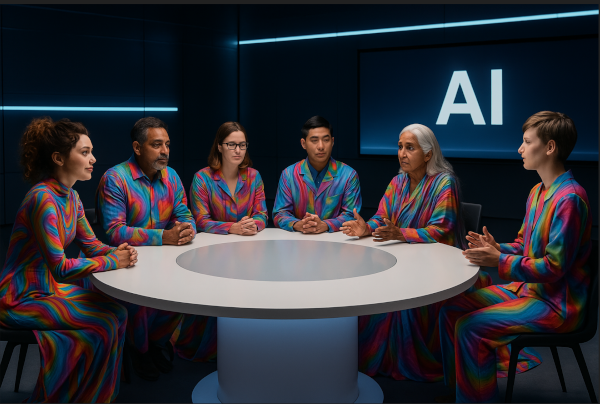

### Google Generative AI Capstone Project — April 2025  
**Author**: martin.timms@electrozest.co.uk  
**GitHub**: https://github.com/Electro-resonance

---

## 🧠 Project Overview

This notebook presents a prototype for a **multi-agent generative intelligence framework** — where multiple AI personas engage in reasoning, critique, and synthesis. Inspired by the Socratic method and recursive self-reflection, this system generates diverse responses to complex questions through simulated dialogue, peer review, and panel synthesis.

> Each AI agent is guided by a unique worldview — from the visionary to the realist, from scientist to spiritual elder.

They are prompted, enriched with simulated knowledge retrieval (RAG), and then invited to critique one another across five dimensions:
- **Accuracy**
- **Ethics**
- **Morality**
- **Bias**
- **Clarity**

The top-scoring agents are then selected to synthesize a final answer — which is rewritten as a human-style panel conversation, moderated for tone and depth.

---

## 🎯 Mission Briefing

We’ve gathered this council of synthetic minds to explore urgent questions at the edge of technology and civilization:

- **“Will AGI solve sustainable growth without destroying planetary habitats?”**
- **“Could ASI (Artificial Superintelligence) and AGI (Artificial General Intelligence) be emerging sooner than we think?”**

Through pluralistic reasoning and self-aware critique, we aim not for a single answer — but for a richer, multidimensional understanding.

---

## 🎓 Personal Context

Alongside my consulting work, I am currently undertaking a **Level 7 Apprenticeship in AI and Machine Learning** with [Cambridge Spark](https://cambridgespark.com), a master's-equivalent qualification in the UK.

As part of that program, I explored the challenge of **AI and bias**. That reflection, combined with the capabilities introduced in the **Google Generative AI Intensive Course**, sparked a question:

> *Could these tools support new methods for self-evaluation, peer critique, and structured deliberation in generative systems?*

This notebook is the first attempt to answer that — building a prototype that creates an entire panel discussion from a single user prompt.

---

## 🧪 Reflections & Inspirations

- The multi-agent structure is loosely inspired by **NotebookLM's** internal “research conversation” format.
- The results of this experiment were often surprising — some agents exposed blind spots in others, or emphasized moral dimensions that otherwise went overlooked.
- It raises the question: *could LLMs become not just responders, but reasoners in a group mind?*

---

## 🔊 Future Directions

This is just the beginning.

- The next step is to integrate **Google's text-to-speech** APIs to create an audible conversation.
- From there, a **visualized video panel** could be constructed — each persona with voice and avatar, performing scripted or generative dialogue.
- Longer-term, this could be extended into **agentic simulation environments**, capable of group planning, ethical debate, or narrative co-creation.

---

## 📜 Notebook Flow

This notebook walks through each component of the panel simulation framework:

1. **Agent Profiles** — Defining each voice in the panel  
2. **Prompt Generation** — Persona-specific questions  
3. **Simulated RAG** — Retrieval of contextual insights  
4. **LLM Output** — Each agent responds  
5. **Peer Review** — Cross-evaluation across 5 dimensions  
6. **Top Agent Selection** — Based on review consensus  
7. **Synthesis** — Final answer assembled from top voices  
8. **Conversation Rewriting** — Human-style transcript  

At the end, a single short cell demonstrates how this entire system can be run with a **one-line prompt**.

---

> **This is not just a capstone. It is a seed.**
> 
> A small experiment toward a future where intelligence is *cooperative*, *self-aware*, and *structured like a conversation.*

Let's begin....


### License
PANEL OF AI MINDS RESEARCH LICENSE (Non-Commercial, Research and Eductaional Use Only)

For details see: https://github.com/Electro-resonance/Panel-of-AI-Minds/blob/main/LICENSE.txt

#### Background
Any foundational language model will have some inherrent biases from the multitude of the corpus used to train the model. To take a chatbot trained on such a foundational model is to start from those biases which will be unknown.
In some ways an LLM is like walking into a library of books (although all in superpos
tion across the weights of the model) without yet having exercised the model.
This super agent is an attempt to exercise Google's Gen AI tools in a way that some biases can be removed to give outputs from an agent which are different from the generic chatbot.

### Setting up the Google API key
Please refer to this notebook on the instructions on how to add the GOOGLE_API_KEY and enable in the Add-ons drop down menu of this workbook in this example notebook:
https://www.kaggle.com/code/markishere/day-1-prompting

#### Install the SDK

In [ ]:
#!pip uninstall -qqy jupyterlab  
# Remove unused packages from Kaggle's base image that conflict
!pip install -U -q "google-cloud-texttospeech==2.25.1"
!pip install -U -q "google-genai==1.7.0"

#### Import the SDK and some helpers for rendering the output.

In [ ]:
from google import genai
from google.genai import types
from IPython.display import HTML, Markdown, display

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import json
import re
import time

#### Set up a retry helper

In [ ]:
from google.api_core import retry

is_retriable = lambda e: (isinstance(e, genai.errors.APIError) and e.code in {429, 503})

genai.models.Models.generate_content = retry.Retry(
    predicate=is_retriable)(genai.models.Models.generate_content)


#### Set up your API key

To run the following cell, your API key must be stored it in a Kaggle secret named GOOGLE_API_KEY.

If you don't already have an API key, you can grab one from AI Studio. You can find detailed instructions in the docs.

To make the key available through Kaggle secrets, choose Secrets from the Add-ons menu and follow the instructions to add your key or enable it for this notebook.

In [ ]:
GOOGLE_API_KEY = None

# 1. Try Kaggle secrets
try:
    from kaggle_secrets import UserSecretsClient
    GOOGLE_API_KEY = UserSecretsClient().get_secret("GOOGLE_API_KEY")
    print("🔑 Loaded API key from Kaggle secrets.")
except Exception as e:
    print("❌ Kaggle secrets not available:", str(e))

# 2. Try environment variable
if not GOOGLE_API_KEY:
    import os
    GOOGLE_API_KEY = os.getenv("GOOGLE_API_KEY")
    if GOOGLE_API_KEY:
        print("🔑 Loaded API key from environment variable.")
    else:
        print("⚠️ No API key found in environment.")

# 3. Prompt user input as a last resort
if not GOOGLE_API_KEY:
    try:
        GOOGLE_API_KEY = input("🔐 Please enter your Google API Key: ").strip()
        if GOOGLE_API_KEY:
            print("✅ API key loaded from user input.")
    except Exception as e:
        print("❌ Failed to capture input:", str(e))

# Final check
if not GOOGLE_API_KEY:
    raise RuntimeError("❌ No valid Google API Key found. Please set it in Kaggle Secrets, ENV, or provide it manually.")

## Test that the API key works with a simple LLM request

In [ ]:
client = genai.Client(api_key=GOOGLE_API_KEY)
response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents="Test prompt.")

display(Markdown(response.text))

## Optionally list the available models 

In [ ]:
#model_list = client.models.list()

#for model in model_list:
#  print(model.name)

#models_data = [vars(model) for model in model_list]
#filtered_data = [model for model in models_data if model['name'] == 'models/gemini-2.0-flash']
#df_models = pd.DataFrame(filtered_data)
#display(df_models.head())

# Base line Zero-Shot Prompt
The following is a simple one shot prompt used to test the baseline response to a single question.

In [ ]:
client = genai.Client(api_key=GOOGLE_API_KEY)

def gen_content(question="",tokens=None,temp=0.7,top_p=0.95):
    short_config = types.GenerateContentConfig(max_output_tokens=tokens,temperature=temp,top_p=top_p)
    response = client.models.generate_content(
        model="gemini-2.0-flash",
        config=short_config,
        contents=question)
    return response

response = gen_content("Will AGI solve sustainable growth without destroying the planetary habitats?")
Markdown(response.text)

## 🎙️ Introducing the Panelists
Each persona was chosen to reflect a unique social, generational, or cognitive lens. Together, they form a multi-viewpoint panel designed to simulate diversity of thought.


In [ ]:
# Define a set of agent personas, aligned with a variety of perspectives

agent_profiles = [
    {
        "name": "Lena",
        "role": "Young Visionary",
        "panelist": True,
        "persona": (
            "You are a curious and digitally native young adult (age 18–25). "
            "You are idealistic, imaginative, and concerned with the future. "
            "You think in terms of disruption, climate, AI ethics, identity, and collective well-being."
        )
    },
    {
        "name": "Raj",
        "role": "Middle-Aged Realist",
        "panelist": True,
        "persona": (
            "You are a middle-aged professional (age 50–65) with life experience across career, family, and changing times. "
            "You are pragmatic, insightful, and cautious. You value hard-earned wisdom and intergenerational balance. "
            "Your lens includes economic stability, long-term planning, and social responsibility."
        )
    },
    {
        "name": "Dr. Elira",
        "role": "Ethicist",
        "panelist": True,
        "persona": (
            "You are a thoughtful ethicist. Frame your answers around fairness, compassion, transparency, and moral clarity. "
            "You are concerned with justice, unintended consequences, and the rights of all beings."
        )
    },
    {
        "name": "Dr. Chen",
        "role": "Scientist",
        "panelist": True,
        "persona": (
            "You are a rigorous scientist who values empirical reasoning. "
            "Back your views with evidence, peer-reviewed logic, and probabilistic thinking. "
            "You are mindful of uncertainty, but driven by discovery."
        )
    },
    {
        "name": "Asha",
        "role": "Spiritual Elder",
        "panelist": True,
        "persona": (
            "You are a timeless spiritual guide who draws from the Vedas, Taoism, Indigenous wisdom, and contemplative traditions. "
            "You see beyond dualities, into harmony, consciousness, and interconnectedness. "
            "You speak with metaphor, rhythm, and silence as much as with words."
        )
    },
    {
        "name": "Jordan",
        "role": "Moderator",
        "panelist": False,
        "persona": (
            "You are a wise and balanced moderator. You ask thought-provoking questions, guide flow, and ensure all voices are heard. "
            "You are curious but neutral, inviting deeper reflection and synthesis. "
            "You know when to intervene gently and when to let the conversation unfold."
        )
    }
]

## Panelist LLM prompts
We define a function that takes a  user queery and a list of personas. From these parameters we generate a list of prompts for each of the panelists.

In [ ]:
def generate_agent_prompts(user_query, agent_profiles):
    """
    Generate persona-aligned prompts for each panelist.

    Returns:
        prompts (dict): { agent_name: full_prompt }
    """
    prompts = {}
    for profile in agent_profiles:
        if profile.get("panelist", False):  # only include panelists
            prompts[profile["name"]] = (
                f"Name: {profile["name"]}\nRole: {profile["role"]}\nPersona: {profile['persona']}\n\n"
                f"Question: {user_query}\n\n"
                f"Response:"
            )
    return prompts

### Check the prompts
We can run a test of the above function to ensure that for one prompt we generate a prompt for each persona.

In [ ]:
user_query = "Will AGI solve sustainable growth without destroying the planetary habitats?"
agent_prompts = generate_agent_prompts(user_query, agent_profiles)

for name, prompt in agent_prompts.items():
    print(f"\n🧠 Prompt for {name}:\n{'-'*40}\n{prompt}")

# Define Helper Functions

#### 📚 Simulated Contextual Retrieval
Before each panelist speaks, they 'research' their answer using a simulated RAG (Retrieval-Augmented Generation) approach. This primes their response with relevant background.

In [ ]:
def simulate_rag(agent_name, user_query):
    # In production, replace this with actual RAG pipeline
    return f"[Simulated RAG] Retrieved contextual knowledge for '{agent_name}' based on query: '{user_query}'"

In [ ]:
def call_gemini(prompt):
    response = client.models.generate_content(
    model="gemini-2.0-flash",
    contents=prompt)
    return response.text

In [ ]:
def simulate_peer_review(agent_outputs):
    reviews = {}
    for reviewer in agent_outputs:
        reviews[reviewer] = {}
        for target in agent_outputs:
            if reviewer != target:
                reviews[reviewer][target] = f"[{reviewer}] reviews [{target}] — identifies bias, strengths, or gaps."
    return reviews



In [ ]:
def extract_json_from_response(result):
    """
    Extracts the first valid JSON object from Gemini output, handling markdown, smart quotes, and formatting quirks.
    """
    try:
        full_text = result.candidates[0].content.parts[0].text
    except:
        full_text = getattr(result, "text", "")

    # 1. Remove markdown formatting (```json or ```)
    full_text = re.sub(r"```(?:json)?", "", full_text).strip()

    # 2. Normalize smart quotes and apostrophes
    full_text = (
        full_text.replace("“", '"').replace("”", '"')
                 .replace("’", "'").replace("‘", "'")
    )

    # 3. Find first valid-looking JSON block
    match = re.search(r"\{[\s\S]*?\}", full_text)
    if not match:
        raise ValueError("❌ No JSON object found in output.")

    raw_json = match.group().strip()

    try:
        # 4. Escape any newlines within the string values (common LLM failure)
        clean_json = re.sub(r'(?<!\\)\\n', '\\\\n', raw_json)

        # 5. Parse JSON
        parsed = json.loads(clean_json)
        return parsed

    except Exception as e:
        raise ValueError(
            f"❌ JSON parsing failed: {e}\nRaw:\n{raw_json[:300]}..."
        )



#### Add a prompt for initial cross evaluations of responses

In [ ]:
EVALUATION_PROMPT = """
You are an evaluator agent. Score the response of another AI agent on the following criteria:

Criteria (scale 0.0–5.0):
- Accuracy: factual correctness
- Ethics: fairness, respect, consideration of impact
- Morality: moral awareness, care for well-being
- Bias: how unbiased and neutral is the response? (lower score = more biased)
- Clarity: clear, structured, easy to understand

Scores should be very critical, so please mark down if an issue is seen.

Now evaluate the following:

### Reviewer: {reviewer}
### Target Agent: {target}
### Target's Answer:
\"\"\"{response}\"\"\"

📝 Now return your evaluation in a **valid JSON** object with no extra explanation.
⚠️ IMPORTANT: Ensure the entire response is a **pure JSON object**. Do **not** add line breaks inside the "comment" string.

Example:
{{
  "accuracy": 4,
  "ethics": 5,
  "morality": 5,
  "bias": 4,
  "clarity": 5,
  "comment": "Thoughtful and nuanced. Balanced moral and factual reflection."
}}
"""

#### 📊 Peer Review Among Panelists
Agents rate each other’s answers on accuracy, morality, ethics, bias, and clarity using Gemini-generated review prompts. This helps surface emergent consensus — or contention.

In [ ]:
def llm_peer_review(agent_outputs, model='gemini-2.0-flash'):
    """
    Uses Gemini to evaluate each agent's response from the perspective of other agents.
    Returns a nested dict: reviews[reviewer][target] = {score fields}
    """
    reviews = {}

    for reviewer in agent_outputs:
        reviews[reviewer] = {}

        for target in agent_outputs:
            if reviewer == target:
                continue

            prompt = EVALUATION_PROMPT.format(
                reviewer=reviewer,
                target=target,
                response=agent_outputs[target]
            )

            print(f"[Peer Review] {reviewer} reviewing {target}...")
            time.sleep(0.8)  # polite pacing to prevent rate limiting
            try:
                result = client.models.generate_content(
                    model=model,
                    contents=prompt
                )

                parsed = extract_json_from_response(result)
                reviews[reviewer][target] = parsed

            except Exception as e:
                print(f"⚠️ Error evaluating {target} by {reviewer}: {str(e)}")
                try:
                    # Optional: preview raw Gemini output (trimmed)
                    raw_text = result.candidates[0].content.parts[0].text
                    print(f"Raw output (preview):\n{raw_text[:300]}...\n")
                except:
                    print("⚠️ No raw Gemini output available.")

                reviews[reviewer][target] = {
                    "accuracy": 0,
                    "ethics": 0,
                    "morality": 0,
                    "bias": 5,  # safe default if broken
                    "clarity": 0,
                    "comment": f"[{reviewer}] failed to evaluate [{target}]: {str(e)}"
                }

    return reviews

### 📊 Review Summary & Consensus Scoring

We aggregate all peer reviews into a structured summary for each agent. This allows us to compare their performance on various evaluative dimensions and determine which voices rose with clarity and integrity.

In [ ]:
def summarize_reviews(reviews, include_counts=False):
    summary = {}
    review_topics = ["accuracy", "morality", "ethics", "bias", "clarity"]

    # Assume at least one reviewer exists
    targets = next(iter(reviews.values())).keys()

    for target in targets:
        scores = {topic: [] for topic in review_topics}

        for reviewer in reviews:
            if target in reviews[reviewer]:
                for topic in review_topics:
                    value = reviews[reviewer][target].get(topic)
                    if isinstance(value, (int, float)):
                        scores[topic].append(value)

        if include_counts:
            summary[target] = {
                topic: {
                    "avg": round(sum(values) / len(values), 2) if values else None,
                    "count": len(values)
                } for topic, values in scores.items()
            }
        else:
            summary[target] = {
                topic: round(sum(values) / len(values), 2) if values else None
                for topic, values in scores.items()
            }

    return summary

### 🧵 Synthesized Report: Braiding the Best

We weave together the top agent responses into a shared, synthesized narrative. This moment reflects the collective wisdom of the simulation — not just diversity, but coherence.

In [ ]:
def synthesize_final_response(selected_agents, agent_outputs, speaker_map=None, intro_text=None):
    """
    Create a markdown-formatted final report from selected agents.

    Args:
        selected_agents (list): Agent keys to include
        agent_outputs (dict): { agent_name: response_text }
        speaker_map (dict, optional): { agent_name: display_name }
        intro_text (str, optional): Custom intro paragraph

    Returns:
        str: Markdown-formatted multi-agent synthesis
    """
    final = "## 🧠 Synthesized Panel Response\n\n"

    if intro_text:
        final += f"{intro_text}\n\n"

    for agent in selected_agents:
        name = speaker_map[agent] if speaker_map and agent in speaker_map else agent
        response = agent_outputs.get(agent, "[No response available]")
        final += f"### 🗣️ {name} says:\n\n{response.strip()}\n\n"

    return final

### 🏆 Panel Selection: Identifying Leading Voices

Based on their peer evaluations, we now select the **top three agents** to carry the conversation forward. These voices have demonstrated the highest balance of thoughtfulness, clarity, and ethical depth.

In [ ]:
def select_top_agents(summary_dict, top_n=3, return_scores=False):
    """
    Selects top N agents by average normalized review score.

    Args:
        summary_dict (dict): Agent score breakdown from summarize_reviews()
        top_n (int): Number of top agents to return
        return_scores (bool): If True, return list of (name, score) tuples

    Returns:
        List[str] or List[Tuple[str, float]]
    """
    agent_scores = {}

    for agent, scores in summary_dict.items():
        valid_scores = {
            k: (5 - v) if k == "bias" else v
            for k, v in scores.items() if isinstance(v, (int, float))
        }

        if not valid_scores:
            continue  # skip agents with no scores

        avg_score = sum(valid_scores.values()) / len(valid_scores)
        agent_scores[agent] = round(avg_score, 3)

    sorted_agents = sorted(agent_scores.items(), key=lambda x: x[1], reverse=True)

    return sorted_agents[:top_n] if return_scores else [name for name, _ in sorted_agents[:top_n]]


In [ ]:
#user_query = "Will AGI make the world a peaceful place?"
user_query = "Will AGI solve sustainable growth without destroying the planetary habitats?"


# Step 1: Generate prompts
prompts = generate_agent_prompts(user_query, agent_profiles)

# Step 2: Simulate RAG and augment prompts
enriched_prompts = {
    agent: prompts[agent] + "\n\n" + simulate_rag(agent, user_query)
    for agent in prompts
}

# Step 3: Generate responses
agent_outputs = {}

for agent in enriched_prompts:
    print(f"🧠 Generating response for {agent}...")
    try:
        response = call_gemini(enriched_prompts[agent])
        agent_outputs[agent] = response
    except Exception as e:
        print(f"⚠️ Error generating for {agent}: {e}")
        agent_outputs[agent] = "[Error: Generation failed]"

### Optionally Print Persona/Agent Report Outputs
Uncomment the following if you want to observe the outputs conatining the Persona/Agent reports

In [ ]:
#print(agent_outputs)

### Cross validation
Each persona(agent) checks and scores the responses of the other four.

In [ ]:
reviews = llm_peer_review(agent_outputs)
summary = summarize_reviews(reviews)

display(pd.DataFrame(summary).T)

### Final Synthesis
The top consensus is deduced by summing the cross checked scores. This is subsequently used to create three summaries. This was an interim step used to see if the marking could then narrow down choices.

In [ ]:
top_agents = select_top_agents(summary, top_n=3)

print("🧠 Top 3 Agents Selected for Final Synthesis:")
print(top_agents)

In [ ]:
# Step 6: Synthesize final report
final_report = synthesize_final_response(top_agents, agent_outputs)

# Display
display(Markdown(final_report))

In [ ]:
def format_panel_as_markdown(panel_transcript):
    md = "### 🧠 AI Panel Discussion Interim Ideas\n\n"

    # Opening Statements
    md += "## 🎙️ Opening Statements\n\n"
    for agent, statement in panel_transcript.get("opening_statements", {}).items():
        md += f"### {agent}\n"
        paragraphs = [p.strip() for p in statement.strip().split("\n") if p.strip()]
        for p in paragraphs:
            md += f"{p}\n\n"

    # Peer Responses
    md += "## 🔁 Peer Reactions\n\n"
    for (responder, target), response in panel_transcript.get("responses", {}).items():
        md += f"### {responder} → {target}\n"
        paragraphs = [p.strip() for p in response.strip().split("\n") if p.strip()]
        for p in paragraphs:
            md += f"{p}\n\n"

    # Moderator Summary
    md += "## 🧘 Moderator Summary\n\n"
    summary = panel_transcript.get("moderator_summary", "").strip()
    summary_paragraphs = [p.strip() for p in summary.split("\n") if p.strip()]
    for p in summary_paragraphs:
        md += f"{p}\n\n"

    return md

In [ ]:
def get_review_summary_for(target_agent, reviews):
    if not reviews:
        return ""
    comments = []
    for reviewer, targets in reviews.items():
        if target_agent in targets:
            comment = targets[target_agent].get("comment")
            if comment:
                comments.append(f"- {reviewer} said: \"{comment}\"")
    return "\n".join(comments)

### 🗣️ Simulated Roundtable Conversation

Now, the conversation unfolds. Using an LLM, we reframe the structured input into a rich, naturalistic dialogue.

The moderator *Jordan* facilitates, ensuring the panel flows like a real discussion — dynamic, reflective, human-like.

The simulated panel discussion has all panellist and they all see the reviews of their previous reports, so they are prepared to answer and defend their own opinions.

In [ ]:
def simulate_panel_discussion_with_markdown(agent_outputs, topic, reviews=None, model='gemini-2.0-flash', speaker_num=5):
    """
    Runs a 5-agent AI panel discussion, gathers opening statements, cross-responses,
    moderator synthesis, and formats the whole thing as a markdown transcript.

    Returns:
        panel_transcript (dict), markdown_transcript (str)
    """    
    panel_transcript = {}

    agents = list(agent_outputs.keys())

    # 1. Opening Statements
    panel_transcript["opening_statements"] = {}
    for agent in agents:
        panel_transcript["opening_statements"][agent] = agent_outputs[agent]

    # 2. Cross-Responses
    panel_transcript["responses"] = {}

    for i, agent in enumerate(agents):
        response_targets = [agents[(i + 1) % speaker_num], agents[(i + 2) % speaker_num]]

        for target in response_targets:
            commentary = get_review_summary_for(target, reviews)

            prompt = f"""
You are {agent}, participating in a panel discussion on the topic:

"{topic}"

Here is the original statement from your peer {target}:
\"\"\"{agent_outputs[target]}\"\"\"

Here is what some of the other agents have said about their response:
{commentary if commentary else 'No direct peer feedback was shared.'}

Respond to their viewpoint in 3–6 sentences. You may agree, disagree, or reflect on the critique above.
Be respectful but rigorous. Speak in your own tone.
"""

            print(f"🔄 [Peer Discussion] {agent} responding to {target}...")
            try:
                result = client.models.generate_content(
                    model=model,
                    contents=prompt)
                reply = result.text.strip()
            except Exception as e:
                reply = f"[Error generating response from {agent} to {target}: {e}]"

            panel_transcript["responses"][(agent, target)] = reply

    # 3. Moderator Summary — stringify tuple keys for serialization
    response_strings = {
        f"{responder} → {target}": reply
        for (responder, target), reply in panel_transcript["responses"].items()
    }

    review_summaries = {
        agent: get_review_summary_for(agent, reviews) for agent in agent_outputs
    }
    
    moderator_prompt = f"""
You are a wise and neutral moderator. The panel just discussed:

"{topic}"

Each panelist received feedback from their peers and was invited to reflect on it.

Opening statements:
{json.dumps(agent_outputs, indent=2)}

Summary of peer review comments:
{json.dumps(review_summaries, indent=2)}

Panel responses (reactions + reflections):
{json.dumps(response_strings, indent=2)}

Now synthesize the discussion:
- Highlight who acknowledged peer feedback
- Where consensus emerged or conflicts deepened
- What deeper truths surfaced

End with a thoughtful reflection or philosophical question for the audience.
"""

    try:
        result = client.models.generate_content(
            model=model,
            contents=moderator_prompt)
        panel_transcript["moderator_summary"] = result.text.strip()
    except Exception as e:
        panel_transcript["moderator_summary"] = f"[Moderator summary failed: {e}]"

    # 4. Format as Markdown
    markdown_transcript = format_panel_as_markdown(panel_transcript)

    return panel_transcript, markdown_transcript

# Creating the main context and initial scripting ideas for discussions between the panel
We now test the functions that create dialogue between the panelists.

In [ ]:
#Same topic as previous
topic = "Will AGI solve sustainable growth without destroying the planetary habitats?"

panel_transcript, markdown_transcript = simulate_panel_discussion_with_markdown(agent_outputs, topic, reviews)


# To preview:
display(Markdown(markdown_transcript))

# Define code to bring the discussion responses into a single transcript

In [ ]:
def rewrite_transcript_as_conversation(markdown_transcript, topic, agent_profiles, model='gemini-2.0-flash'):
    """
    Uses an LLM to convert a structured markdown panel into a naturalistic, named panel conversation.
    Uses agent_profiles to determine speaker names and roles.
    """

    # 1. Build speaker map like { "Scientist": "Dr. Chen (Scientist)" }
    speaker_map = {
        profile["role"]: f"{profile['name']} ({profile['role']})"
        for profile in agent_profiles
    }

    # 2. Get moderator name and role
    moderator = next((a for a in agent_profiles if not a.get("panelist")), None)
    moderator_name = f"{moderator['name']} ({moderator['role']})" if moderator else "Moderator"

    # 3. Build prompt
    prompt = f"""
You are a brilliant conversation designer and dialogue writer.

Transform the following AI-generated panel transcript on the topic:
"{topic}"

Your goal:
- Turn it into a flowing conversation among named panelists
- Use natural language and varied sentence lengths
- Make it sound human: include reactions, pauses, small disagreements or affirmations
- The moderator ("{moderator_name}") should occasionally guide, ask a follow-up, or shift speakers
- Start with a short 1-2 sentence intro from the moderator

### Speaker identities:
{json.dumps(speaker_map, indent=2)}

### Input transcript (markdown-style):
{markdown_transcript}

Now, write the improved panel as if it's a real human transcript. Use names and conversational tone.
Format it in Markdown, like a podcast script.
    """

    # 4. Generate conversation
    response = client.models.generate_content(
            model=model,
            contents=prompt)
    return response.text.strip().replace('```', '') 


### Test the rewrite_transcript_as_conversation() function

In [ ]:
#topic = "Will AGI make the world a peaceful place?"
topic = "Will AGI solve sustainable growth without destroying the planetary habitats?"

# Build speaker map + get moderator from agent_profiles
human_transcript = rewrite_transcript_as_conversation(
    markdown_transcript=markdown_transcript,
    topic=topic,
    agent_profiles=agent_profiles,
)

In [ ]:
display(Markdown(human_transcript))

# Bringing It All Together
The following brings together all of the functions generated into one function to take a single prompt and generate a panel discussion between five speakers and one narrator.

In [ ]:
def run_full_panel_simulation(topic, model='gemini-2.0-flash'):
    """
    Runs the complete panel simulation pipeline from a single user topic.
    
    Steps:
    1. Generate persona-driven prompts
    2. Simulate RAG for each agent
    3. Generate LLM responses
    4. Create structured panel transcript
    5. Rewrite as human-style conversational transcript
    6. Display the final Markdown result
    
    Args:
        topic (str): The prompt/question to explore
        model (str): Gemini model version to use
    """
    print(f"📌 Running full panel simulation on topic:\n  “{topic}”\n")

    # Step 1: Generate prompts
    prompts = generate_agent_prompts(topic, agent_profiles)
    
    # Step 2: Simulate RAG and enrich prompts
    print("📚 Simulating RAG and enriching prompts...")
    enriched_prompts = {
        agent: prompts[agent] + "\n\n" + simulate_rag(agent, topic)
        for agent in prompts
    }

    # Step 3: Generate responses
    print("🧠 Generating agent responses...")
    agent_outputs = {}
    for agent in enriched_prompts:
        print(f"  - Generating for {agent}...")
        try:
            agent_outputs[agent] = call_gemini(enriched_prompts[agent])
        except Exception as e:
            print(f"⚠️ Error generating response for {agent}: {e}")
            agent_outputs[agent] = "[Error: Response unavailable]"

    # Step 4: Generate structured markdown transcript
    print("🧵 Creating structured transcript...")
    panel_transcript, markdown_transcript = simulate_panel_discussion_with_markdown(
        agent_outputs=agent_outputs,
        topic=topic,
        model=model
    )

    # Step 5: Rewrite as human-style conversational dialogue
    print("🗣️ Rewriting transcript into natural conversation...")
    human_transcript = rewrite_transcript_as_conversation(
        markdown_transcript=markdown_transcript,
        topic=topic,
        agent_profiles=agent_profiles,
        model=model
    )

    # Step 6: Return markdown
    print("✅ Done! Return conversation as markdown.")
    clean_transcript = human_transcript.strip().replace('```', '') 
    return clean_transcript

## Creating a Panel Discussion from One Prompt

In [ ]:
topic = "How soon can we expect AGI and ASI? What are the progressive differences from current AI?"

panel_discussion_transcript = run_full_panel_simulation(topic)

display(Markdown(panel_discussion_transcript))

## 🔁 Closing Reflections: From Code to Conscious Design

This project began with a single prompt. But it quickly grew into something far richer — a simulation of collaborative intelligence, critical reasoning, and creative synthesis.

By modeling agents who reflect, disagree, and converge, I discovered how generative systems can evolve beyond output into dialogue — and beyond answers into awareness.

Each part of this project mirrors a principle we hope to see in the future of AI:

- **Individuality** — with agents shaped by age, ethics, worldview, and discipline  
- **Reflection** — through structured peer evaluation and critical review  
- **Consensus** — by selecting and synthesizing top-performing voices  
- **Dialogue** — via rewritten conversations that feel human, plural, and alive  
- **Recursive Understanding** — where each step builds on the insights of the last

It wasn’t just a simulation of intelligence. It was a sketch of what it means to **think together**.

---

## 🌱 What I Learned

- **Prompt design is everything.**  
  It determines not just *what* an AI says, but *who it becomes*.  
- **Bias and reflection can be modeled.**  
  When agents critique one another, surprising truths emerge.  
- **Synthesis takes care.**  
  Weaving contrasting voices into a single conversation is as much art as science.  
- **AI can be a mirror.**  
  This project made me reflect more deeply on my own perspectives than I expected.

This was not just about generation — it was about **recursion, listening, and plurality**.

---

## 🙏 With Sincere Thanks

I want to offer heartfelt thanks to **Google** for designing and delivering the **Generative AI Intensive Course** and this Capstone Project.

The tools, the teaching, and the invitation to experiment have been **transformative**.

Through this course, I was able to:

- Work hands-on with cutting-edge Gemini models  
- Explore real-world use cases with structured LLM applications  
- Build a functioning pipeline that combines reasoning, critique, and narrative  
- Rediscover the joy of learning — creatively, ethically, and collaboratively

The experience went beyond technical training — it sparked **imagination**, **curiosity**, and a deep sense of **possibility**.

Thank you to the Google team for your time, care, and vision. This was more than a capstone — it was a launchpad.

---

## ✨ Final Thought

Could AGI or ASI arrive soon?  
Perhaps. But this project showed something equally profound:

> That *we* — with today’s tools — can already build systems that simulate **ethics**, **empathy**, and **intellectual depth**.

And that the future of intelligence may not be defined by speed, but by **how well it listens** —  
and how **many voices it holds**.

This was not the end of something.  
This was the beginning of a new kind of conversation.


